<h2 style="text-align: center; color: blue;">Assignment 1</h2>

In [ ]:
# Title: Assignment 1
# Group Name: Maduabughichi Achilefu & Onyedikachukwu Okeke
# Course: EAI6020
# Instructor: Siddharth Rout
# Date: November 2024

<h2 style="text-align: center; color: blue;">Install all the required packages</h2>

In [ ]:
# %pip install torch
# !pip install numpy
# !pip install pandas
# !pip install matplotlib seaborn
# !pip install torch
# !pip install xlrd

<h2 style="text-align: center; color: blue;">Import all the necessary packages</h2>

In [44]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch as torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error as root_mean_squared_error

<h2 style="text-align: center; color: blue;">Read and display Dataframe</h2>

In [45]:
# Define the path to the uploaded file
file_path = 'FL_Dashboard_AY2009_2010_Q1.xls'

# Load the "Quarterly Activity" sheet, skipping the first 5 rows for metadata
quarterly_activity = pd.read_excel(file_path, sheet_name='Quarterly Activity', skiprows=5)
quarterly_activity

,OPE ID,School,State,Zip Code,School Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,...,Recipients.2,# of Loans Originated.2,$ of Loans Originated.2,# of Disbursements.2,$ of Disbursements.2,Recipients.3,# of Loans Originated.3,$ of Loans Originated.3,# of Disbursements.3,$ of Disbursements.3
0,106100,ALASKA PACIFIC UNIVERSITY,AK,995084672,PRIVATE,291,291,1546994,292,830513,...,31,33,386770,35,192181,5,5,69730,5,34865
1,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,1413,1434,6394735,1455,3290699,...,36,40,265784,40,138160,4,4,68620,4,28988
2,106500,UNIVERSITY OF ALASKA SOUTHEAST,AK,998018680,PUBLIC,406,409,1866473,439,1044946,...,8,8,88046,8,44024,0,0,0,0,0
3,1146200,UNIVERSITY OF ALASKA ANCHORAGE,AK,995088050,PUBLIC,2998,3042,12780036,3045,6440086,...,123,125,1288224,125,645683,9,11,43878,11,24063
4,2541000,ALASKA CAREER COLLEGE,AK,995071033,PROPRIETARY,38,38,103869,38,52178,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,393200,UNIVERSITY OF WYOMING,WY,820713663,PUBLIC,2699,2735,12341711,2738,6819888,...,195,207,1830536,209,950682,58,65,740877,66,416236
3816,393300,WESTERN WYOMING COMMUNITY COLLEGE,WY,829010428,PUBLIC,214,214,731883,215,359742,...,2,2,13300,2,6650,0,0,0,0,0
3817,728900,CENTRAL WYOMING COLLEGE,WY,825012215,PUBLIC,149,154,414959,154,212783,...,7,7,34978,7,17492,0,0,0,0,0
3818,915700,WYOTECH,WY,820729519,PROPRIETARY,1049,1099,2554580,1220,1498483,...,478,490,7567391,522,4033026,0,0,0,0,0


In [46]:
# Display basic information to confirm structure and content
file_summary = {
    'File': 'Q1',
    'Shape': quarterly_activity.shape,
    'Columns': quarterly_activity.columns.tolist()
}

# Display the first few rows to confirm the structure and column names
print("File Summary:")
file_summary

File Summary:


{'File': 'Q1',
 'Shape': (3820, 25),
 'Columns': ['OPE ID',
  'School',
  'State',
  'Zip Code',
  'School Type',
  'Recipients',
  '# of Loans Originated',
  '$ of Loans Originated',
  '# of Disbursements',
  '$ of Disbursements',
  'Recipients.1',
  '# of Loans Originated.1',
  '$ of Loans Originated.1',
  '# of Disbursements.1',
  '$ of Disbursements.1',
  'Recipients.2',
  '# of Loans Originated.2',
  '$ of Loans Originated.2',
  '# of Disbursements.2',
  '$ of Disbursements.2',
  'Recipients.3',
  '# of Loans Originated.3',
  '$ of Loans Originated.3',
  '# of Disbursements.3',
  '$ of Disbursements.3']}

<h2 style="text-align: center; color: blue;">Data Cleaning and Preprocessing for Regression Analysis</h2>

In [47]:
# Clean Dollar Amount Columns
# ====================================
# Identify columns with dollar amounts (assumes column names start with '$')
dollar_cols = [col for col in quarterly_activity.columns if col.startswith('$')]
for col in dollar_cols:
    # Remove '$' and ',' characters and convert to float for numerical analysis
    quarterly_activity[col] = quarterly_activity[col].replace('[\$,]', '', regex=True).astype(float)

# Handle Missing or Placeholder Values
# ============================================
# Replace placeholders like '-' with 0 or NaN for consistency
quarterly_activity = quarterly_activity.replace('-', 0) 

# Encode Categorical Variables with One-Hot Encoding
# ==========================================================
# Specify categorical columns for encoding
categorical_cols = ['School', 'State', 'School Type']
# Perform one-hot encoding for categorical columns and add them to the dataset
quarterly_activity = pd.get_dummies(quarterly_activity, columns=categorical_cols) # , drop_first=True

# Step 4: Normalize Numerical Features
# ====================================
# Exclude identifier columns (like 'OPE ID' and 'Zip Code') from numerical scaling
excluded_cols = ['OPE ID', 'Zip Code']
numerical_cols = [col for col in quarterly_activity.columns if col not in excluded_cols + categorical_cols] # + dollar_cols
# Initialize the scaler and apply it to numerical features
scaler = StandardScaler()
quarterly_activity[numerical_cols] = scaler.fit_transform(quarterly_activity[numerical_cols])

# Define the Target Variable and Separate Features
# ========================================================
# Select the target column for regression and drop it from the dataset
target_col = '$ of Loans Originated'
Y = quarterly_activity[target_col].values  # Target values
quarterly_activity = quarterly_activity.drop(columns=[target_col] + excluded_cols)  # Drop target and identifiers from features

# Convert to Final Features Matrix (X) for Model Training
# ===============================================================
# Convert all features to a single matrix and handle any remaining NaN values if present
X = np.nan_to_num(quarterly_activity.values).astype(np.float32)

# Verification Step
# ===============================================================
# Display a summary of the preprocessed data to ensure transformations are correctly applied
print("Sample of preprocessed feature matrix (X):")
print(X[:5])
print("\nSample of target values (Y):")
print(Y[:5])


Sample of preprocessed feature matrix (X):
[[-0.21989422 -0.22164474 -0.22297892 ...  1.344925   -0.59226507
  -0.6306595 ]
 [ 0.3348271   0.33326906  0.32670808 ... -0.7435358  -0.59226507
   1.5856416 ]
 [-0.16303775 -0.16435705 -0.15349999 ... -0.7435358  -0.59226507
   1.5856416 ]
 [ 1.1184574   1.1139352   1.0782148  ... -0.7435358  -0.59226507
   1.5856416 ]
 [-0.34497842 -0.34447342 -0.34303093 ... -0.7435358   1.6884332
  -0.6306595 ]]

Sample of target values (Y):
[-0.19826615  0.31924373 -0.16416088  1.00089244 -0.35232377]


<h2 style="text-align: center; color: blue;">Conversion to PyTorch Tensors for Model Training</h2>

In [48]:
# Step 1: Convert Features (X) to a PyTorch Tensor
# =================================================
# Convert the preprocessed feature matrix (X) into a PyTorch tensor with float32 data type
X_tensor = torch.tensor(X, dtype=torch.float32)

# Step 2: Convert Target Variable (Y) to a PyTorch Tensor
# =======================================================
# Ensure target variable (Y) is in float32 format and reshape it to a column vector for compatibility
Y = np.array(Y).astype(np.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Step 3: Verify Tensor Shapes
# ============================
# Print shapes to confirm that X_tensor and Y_tensor are correctly structured
print("Feature Tensor Shape (X):", X_tensor.shape)
print("Target Tensor Shape (Y):", Y_tensor.shape)


Feature Tensor Shape (X): torch.Size([3820, 3633])
Target Tensor Shape (Y): torch.Size([3820, 1])


<h2 style="text-align: center; color: blue;">Neural Network for Regression with PyTorch</h2>

In [49]:
# Step 1: Define the Neural Network Structure
# ===========================================
# Define a simple feedforward neural network for regression tasks
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, 50)  # First hidden layer with 50 neurons
        self.fc2 = nn.Linear(50, 20)          # Second hidden layer with 20 neurons
        self.fc3 = nn.Linear(20, 1)           # Output layer with 1 neuron for regression output

    def forward(self, x):
        # Forward pass with ReLU activation for hidden layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation for output layer in regression
        return x

# Step 2: Split the Dataset into Training and Validation Sets
# ===========================================================
# Split data into 80% training and 20% validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Step 3: Initialize the Model, Loss Function, and Optimizer
# ==========================================================
# Initialize the model with the correct input size
input_size = X_train.shape[1]
model = RegressionNN(input_size)

# Define Mean Squared Error loss for regression and Adam optimizer for model training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate set to 0.001

# Step 4: Define the Training Function
# ====================================
# Function to train the neural network model
def train_nn_model(model, criterion, optimizer, X_train, Y_train, X_val, Y_val, epochs=1000):
    train_losses = []  # List to store training losses
    val_losses = []    # List to store validation losses
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()               # Zero the gradients
        output = model(X_train)             # Forward pass
        loss = criterion(output, Y_train)   # Compute training loss
        loss.backward()                     # Backpropagation
        optimizer.step()                    # Update model parameters

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)       # Forward pass on validation set
            val_loss = criterion(val_output, Y_val)  # Compute validation loss

        # Store losses for plotting or analysis
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        
        # Print epoch progress
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

    return train_losses, val_losses

<h2 style="text-align: center; color: blue;">Displaying Training and Validation Losses After Model Training Length</h2>

In [50]:
# Check the number of epochs recorded in each list
# ================================================================
# Ensure the training and validation loss lists have the same length
print("\nNumber of Epochs Recorded:")
print("Training Loss Count:", len(train_losses))
print("Validation Loss Count:", len(val_losses))


Number of Epochs Recorded:
Training Loss Count: 1000
Validation Loss Count: 1000


<h2 style="text-align: center; color: blue;">Model Training, Visualization of Loss, and Performance Recording</h2>

Epoch 1/1000, Train Loss: 1.0712612867355347, Val Loss: 0.7020761370658875
Epoch 2/1000, Train Loss: 1.0369288921356201, Val Loss: 0.6926442384719849
Epoch 3/1000, Train Loss: 1.0039918422698975, Val Loss: 0.6826407313346863
Epoch 4/1000, Train Loss: 0.9703336954116821, Val Loss: 0.6720301508903503
Epoch 5/1000, Train Loss: 0.9357327818870544, Val Loss: 0.6606324315071106
Epoch 6/1000, Train Loss: 0.8997512459754944, Val Loss: 0.6485871076583862
Epoch 7/1000, Train Loss: 0.8625906109809875, Val Loss: 0.6363173723220825
Epoch 8/1000, Train Loss: 0.8242636322975159, Val Loss: 0.6237665414810181
Epoch 9/1000, Train Loss: 0.7848572134971619, Val Loss: 0.6106843948364258
Epoch 10/1000, Train Loss: 0.7444900870323181, Val Loss: 0.5969259142875671
Epoch 11/1000, Train Loss: 0.7035156488418579, Val Loss: 0.5824192762374878
Epoch 12/1000, Train Loss: 0.6619305610656738, Val Loss: 0.5674213767051697
Epoch 13/1000, Train Loss: 0.6201650500297546, Val Loss: 0.551925778388977
Epoch 14/1000, Train L

Epoch 112/1000, Train Loss: 0.00012192656868137419, Val Loss: 0.23556435108184814
Epoch 113/1000, Train Loss: 0.0001182303749374114, Val Loss: 0.2355305552482605
Epoch 114/1000, Train Loss: 0.00011508980969665572, Val Loss: 0.23548747599124908
Epoch 115/1000, Train Loss: 0.00011236799764446914, Val Loss: 0.23543696105480194
Epoch 116/1000, Train Loss: 0.00011009728768840432, Val Loss: 0.23538097739219666
Epoch 117/1000, Train Loss: 0.00010819986346177757, Val Loss: 0.23532292246818542
Epoch 118/1000, Train Loss: 0.00010652733180904761, Val Loss: 0.23526477813720703
Epoch 119/1000, Train Loss: 0.00010499619384063408, Val Loss: 0.23520901799201965
Epoch 120/1000, Train Loss: 0.00010338394349673763, Val Loss: 0.2351587563753128
Epoch 121/1000, Train Loss: 0.00010168171866098419, Val Loss: 0.23511509597301483
Epoch 122/1000, Train Loss: 9.989801765186712e-05, Val Loss: 0.2350763976573944
Epoch 123/1000, Train Loss: 9.807623428059742e-05, Val Loss: 0.2350408285856247
Epoch 124/1000, Train L

Epoch 221/1000, Train Loss: 2.7242214855505154e-05, Val Loss: 0.23239010572433472
Epoch 222/1000, Train Loss: 2.7100952138425782e-05, Val Loss: 0.23237785696983337
Epoch 223/1000, Train Loss: 2.6957839509123005e-05, Val Loss: 0.23236465454101562
Epoch 224/1000, Train Loss: 2.6817753678187728e-05, Val Loss: 0.23235146701335907
Epoch 225/1000, Train Loss: 2.6689884180086665e-05, Val Loss: 0.23233847320079803
Epoch 226/1000, Train Loss: 2.6550509574008174e-05, Val Loss: 0.23232632875442505
Epoch 227/1000, Train Loss: 2.6420553695061244e-05, Val Loss: 0.2323143631219864
Epoch 228/1000, Train Loss: 2.6294130293536e-05, Val Loss: 0.2323029637336731
Epoch 229/1000, Train Loss: 2.6167394025833346e-05, Val Loss: 0.23229113221168518
Epoch 230/1000, Train Loss: 2.604420660645701e-05, Val Loss: 0.23227915167808533
Epoch 231/1000, Train Loss: 2.5924222427420318e-05, Val Loss: 0.2322671264410019
Epoch 232/1000, Train Loss: 2.580788714112714e-05, Val Loss: 0.2322559505701065
Epoch 233/1000, Train Los

Epoch 328/1000, Train Loss: 1.9420132957748137e-05, Val Loss: 0.23153133690357208
Epoch 329/1000, Train Loss: 1.9375456759007648e-05, Val Loss: 0.23152294754981995
Epoch 330/1000, Train Loss: 1.9330636860104278e-05, Val Loss: 0.23151427507400513
Epoch 331/1000, Train Loss: 1.9286564565845765e-05, Val Loss: 0.23150552809238434
Epoch 332/1000, Train Loss: 1.924604111991357e-05, Val Loss: 0.23149685561656952
Epoch 333/1000, Train Loss: 1.9205854187021032e-05, Val Loss: 0.23148828744888306
Epoch 334/1000, Train Loss: 1.916602377605159e-05, Val Loss: 0.23148059844970703
Epoch 335/1000, Train Loss: 1.9126860934193246e-05, Val Loss: 0.23147273063659668
Epoch 336/1000, Train Loss: 1.9088012777501717e-05, Val Loss: 0.23146428167819977
Epoch 337/1000, Train Loss: 1.9049122784053907e-05, Val Loss: 0.23145538568496704
Epoch 338/1000, Train Loss: 1.9011427866644226e-05, Val Loss: 0.23144681751728058
Epoch 339/1000, Train Loss: 1.8973887563333847e-05, Val Loss: 0.23143868148326874
Epoch 340/1000, Tr

Epoch 434/1000, Train Loss: 1.6100551874842495e-05, Val Loss: 0.23071838915348053
Epoch 435/1000, Train Loss: 1.6073374354164116e-05, Val Loss: 0.2307107299566269
Epoch 436/1000, Train Loss: 1.6044283256633207e-05, Val Loss: 0.23070307075977325
Epoch 437/1000, Train Loss: 1.6017242160160094e-05, Val Loss: 0.23069633543491364
Epoch 438/1000, Train Loss: 1.5995174180716276e-05, Val Loss: 0.23068957030773163
Epoch 439/1000, Train Loss: 1.5973313566064462e-05, Val Loss: 0.23068243265151978
Epoch 440/1000, Train Loss: 1.595107460161671e-05, Val Loss: 0.23067551851272583
Epoch 441/1000, Train Loss: 1.5925632396829315e-05, Val Loss: 0.23066779971122742
Epoch 442/1000, Train Loss: 1.5898309356998652e-05, Val Loss: 0.230660542845726
Epoch 443/1000, Train Loss: 1.58731982082827e-05, Val Loss: 0.23065316677093506
Epoch 444/1000, Train Loss: 1.585013342264574e-05, Val Loss: 0.23064567148685455
Epoch 445/1000, Train Loss: 1.5827214156161062e-05, Val Loss: 0.23063881695270538
Epoch 446/1000, Train L

Epoch 536/1000, Train Loss: 1.4169119822327048e-05, Val Loss: 0.2299872636795044
Epoch 537/1000, Train Loss: 1.4153512893244624e-05, Val Loss: 0.22997964918613434
Epoch 538/1000, Train Loss: 1.4138170627120417e-05, Val Loss: 0.2299727350473404
Epoch 539/1000, Train Loss: 1.4122549146122765e-05, Val Loss: 0.22996658086776733
Epoch 540/1000, Train Loss: 1.410767526976997e-05, Val Loss: 0.22995921969413757
Epoch 541/1000, Train Loss: 1.4092584024183452e-05, Val Loss: 0.22995199263095856
Epoch 542/1000, Train Loss: 1.4077081686991733e-05, Val Loss: 0.22994530200958252
Epoch 543/1000, Train Loss: 1.4061707588552963e-05, Val Loss: 0.22993901371955872
Epoch 544/1000, Train Loss: 1.404659815307241e-05, Val Loss: 0.2299318015575409
Epoch 545/1000, Train Loss: 1.4032182662049308e-05, Val Loss: 0.2299245446920395
Epoch 546/1000, Train Loss: 1.401799909217516e-05, Val Loss: 0.2299167811870575
Epoch 547/1000, Train Loss: 1.400301971443696e-05, Val Loss: 0.22990922629833221
Epoch 548/1000, Train Los

Epoch 644/1000, Train Loss: 1.2669658644881565e-05, Val Loss: 0.22920918464660645
Epoch 645/1000, Train Loss: 1.2649725249502808e-05, Val Loss: 0.22920119762420654
Epoch 646/1000, Train Loss: 1.262829391635023e-05, Val Loss: 0.22919495403766632
Epoch 647/1000, Train Loss: 1.2613055332622025e-05, Val Loss: 0.22918805480003357
Epoch 648/1000, Train Loss: 1.2605355550476816e-05, Val Loss: 0.22918137907981873
Epoch 649/1000, Train Loss: 1.2593403880600818e-05, Val Loss: 0.22917337715625763
Epoch 650/1000, Train Loss: 1.2578037058119662e-05, Val Loss: 0.22916649281978607
Epoch 651/1000, Train Loss: 1.2568136298796162e-05, Val Loss: 0.22916002571582794
Epoch 652/1000, Train Loss: 1.2559820788737852e-05, Val Loss: 0.2291528433561325
Epoch 653/1000, Train Loss: 1.2545195204438642e-05, Val Loss: 0.2291455715894699
Epoch 654/1000, Train Loss: 1.253031769010704e-05, Val Loss: 0.22913779318332672
Epoch 655/1000, Train Loss: 1.251765206689015e-05, Val Loss: 0.22913025319576263
Epoch 656/1000, Train

Epoch 750/1000, Train Loss: 1.1417327186791226e-05, Val Loss: 0.22844268381595612
Epoch 751/1000, Train Loss: 1.1407229067117441e-05, Val Loss: 0.22843575477600098
Epoch 752/1000, Train Loss: 1.1400730727473274e-05, Val Loss: 0.22842970490455627
Epoch 753/1000, Train Loss: 1.139147479989333e-05, Val Loss: 0.22842220962047577
Epoch 754/1000, Train Loss: 1.1379472198314033e-05, Val Loss: 0.22841504216194153
Epoch 755/1000, Train Loss: 1.1369047570042312e-05, Val Loss: 0.22840717434883118
Epoch 756/1000, Train Loss: 1.136241371568758e-05, Val Loss: 0.2284008264541626
Epoch 757/1000, Train Loss: 1.1356783033988904e-05, Val Loss: 0.22839365899562836
Epoch 758/1000, Train Loss: 1.134974809247069e-05, Val Loss: 0.22838646173477173
Epoch 759/1000, Train Loss: 1.1340588571329135e-05, Val Loss: 0.22837881743907928
Epoch 760/1000, Train Loss: 1.1312617061776109e-05, Val Loss: 0.22837159037590027
Epoch 761/1000, Train Loss: 1.1304795407340862e-05, Val Loss: 0.2283647507429123
Epoch 762/1000, Train

Epoch 857/1000, Train Loss: 1.0342694622522686e-05, Val Loss: 0.22766394913196564
Epoch 858/1000, Train Loss: 1.0333669706596993e-05, Val Loss: 0.2276565134525299
Epoch 859/1000, Train Loss: 1.0327414202038199e-05, Val Loss: 0.22764946520328522
Epoch 860/1000, Train Loss: 1.0321335139451548e-05, Val Loss: 0.2276429831981659
Epoch 861/1000, Train Loss: 1.0313859093002975e-05, Val Loss: 0.2276362031698227
Epoch 862/1000, Train Loss: 1.0305031537427567e-05, Val Loss: 0.227629616856575
Epoch 863/1000, Train Loss: 1.029670238494873e-05, Val Loss: 0.22762128710746765
Epoch 864/1000, Train Loss: 1.0290273166901898e-05, Val Loss: 0.22761425375938416
Epoch 865/1000, Train Loss: 1.0284788004355505e-05, Val Loss: 0.22760514914989471
Epoch 866/1000, Train Loss: 1.0277573892381042e-05, Val Loss: 0.2275988757610321
Epoch 867/1000, Train Loss: 1.0267331163049676e-05, Val Loss: 0.2275901734828949
Epoch 868/1000, Train Loss: 1.0254650078422856e-05, Val Loss: 0.22758330404758453
Epoch 869/1000, Train Lo

Epoch 959/1000, Train Loss: 9.452652193431277e-06, Val Loss: 0.22691725194454193
Epoch 960/1000, Train Loss: 9.44133716984652e-06, Val Loss: 0.22691045701503754
Epoch 961/1000, Train Loss: 9.428446901438292e-06, Val Loss: 0.22690296173095703
Epoch 962/1000, Train Loss: 9.416147804586217e-06, Val Loss: 0.22689515352249146
Epoch 963/1000, Train Loss: 9.406251592736226e-06, Val Loss: 0.22688788175582886
Epoch 964/1000, Train Loss: 9.39973870117683e-06, Val Loss: 0.22688086330890656
Epoch 965/1000, Train Loss: 9.393314940098207e-06, Val Loss: 0.2268744260072708
Epoch 966/1000, Train Loss: 9.387399586557876e-06, Val Loss: 0.22686654329299927
Epoch 967/1000, Train Loss: 9.379938092024531e-06, Val Loss: 0.22685961425304413
Epoch 968/1000, Train Loss: 9.37124241318088e-06, Val Loss: 0.22685255110263824
Epoch 969/1000, Train Loss: 9.36272135731997e-06, Val Loss: 0.22684530913829803
Epoch 970/1000, Train Loss: 9.355801921628881e-06, Val Loss: 0.22683879733085632
Epoch 971/1000, Train Loss: 9.350

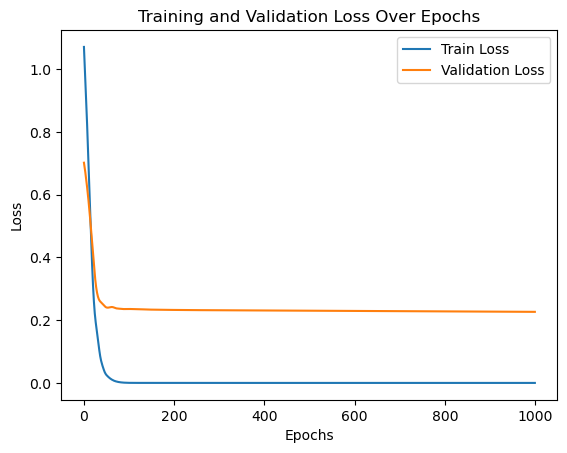

Model Performance Summary (First 10 Epochs):
   Epoch  Train Loss  Validation Loss
0      1    1.071261         0.702076
1      2    1.036929         0.692644
2      3    1.003992         0.682641
3      4    0.970334         0.672030
4      5    0.935733         0.660632
5      6    0.899751         0.648587
6      7    0.862591         0.636317
7      8    0.824264         0.623767
8      9    0.784857         0.610684
9     10    0.744490         0.596926


In [51]:
# Step 1: Train the Model and Capture Loss History
# ===========================================================
# Train the model for a specified number of epochs and retrieve training and validation loss history
train_losses, val_losses = train_nn_model(model, criterion, optimizer, X_train, Y_train, X_val, Y_val, epochs=1000)

# Step 2: Visualize Training and Validation Losses
# ===========================================================
# Plot the training and validation losses over the epochs to evaluate the learning process
plt.plot(train_losses, label='Train Loss')           # Plot training loss
plt.plot(val_losses, label='Validation Loss')        # Plot validation loss
plt.xlabel('Epochs')                                 # Label x-axis as "Epochs"
plt.ylabel('Loss')                                   # Label y-axis as "Loss"
plt.legend()                                         # Add legend to differentiate lines
plt.title("Training and Validation Loss Over Epochs") # Title for clarity
plt.show()                                           # Display the plot

# Step 3: Record Model Performance into a DataFrame
# ===========================================================
# Save the epoch-wise training and validation losses in a DataFrame for detailed analysis
num_epochs = len(train_losses)   # Total number of epochs recorded
model_performance = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1),   # Epoch numbers starting from 1
    'Train Loss': train_losses,          # Training losses by epoch
    'Validation Loss': val_losses        # Validation losses by epoch
})

# Display a preview of the recorded model performance
print("Model Performance Summary (First 10 Epochs):")
print(model_performance.head(10))


<h2 style="text-align: center; color: blue;">Visualizing Training and Validation Losses with Annotations</h2>

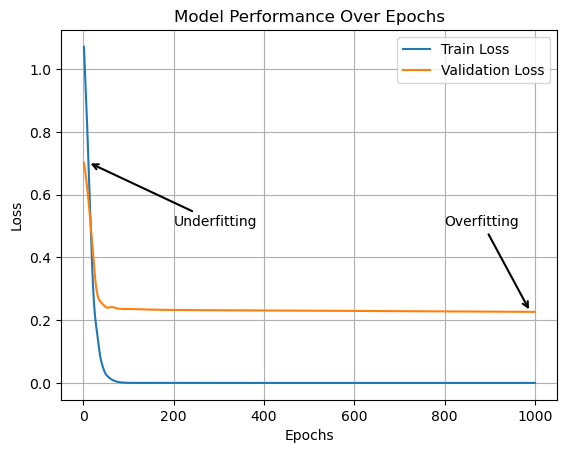

In [52]:
# Step 1: Plot Training and Validation Losses
# ===========================================
# Plot the training and validation losses across epochs to visualize the model's performance
plt.plot(model_performance['Epoch'], model_performance['Train Loss'], label='Train Loss')
plt.plot(model_performance['Epoch'], model_performance['Validation Loss'], label='Validation Loss')

# Step 2: Annotate Underfitting and Overfitting Points
# ====================================================
# Mark the approximate locations where underfitting and overfitting could be observed
# Adjust the xy and xytext coordinates based on the actual data scale for accuracy
plt.annotate('Underfitting', xy=(10, model_performance['Train Loss'][10]), xytext=(200, 0.5),
             arrowprops=dict(facecolor='red', arrowstyle="->", lw=1.5))

plt.annotate('Overfitting', xy=(num_epochs-10, model_performance['Validation Loss'][num_epochs-10]), xytext=(800, 0.5),
             arrowprops=dict(facecolor='red', arrowstyle="->", lw=1.5))

# Step 3: Customize Plot Aesthetics
# ===========================================
# Add axis labels, title, and legend for a complete plot presentation
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance Over Epochs')
plt.legend()  # Add legend to differentiate the losses
plt.grid(True)  # Optional: Add grid for better readability of the plot
plt.show()


<h2 style="text-align: center; color: blue;">Evaluation of Regression Model Performance Metrics</h2>

In [53]:
# Generate predictions on the validation set
Y_pred_val = model(X_val).detach().numpy()  # Detach and convert to NumPy array for evaluation

# Step 1: Compute Regression Metrics
# ==================================
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_val, Y_pred_val)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_val, Y_pred_val)

# Calculate the Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(Y_val, Y_pred_val)  # For RMSE directly

# Step 2: Display the Metrics
# ==================================
# Print each metric for model evaluation
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.22661774
Mean Absolute Error (MAE): 0.38910368
Root Mean Squared Error (RMSE): 0.22661774
